In [1]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(lme4)
library(lmerTest)
library("lubridate")
library(readxl)
library(sjPlot)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: Matrix

Attaching package: ‘Matrix’

The following object is masked from ‘package:tidyr’:

    expand


Attaching package: ‘lmerTest’

The following object is masked from ‘package:lme4’:

    lmer

The following object is masked from ‘package:stats’:

    step


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



# Import Data

In [2]:
data <- read.csv("/Users/a1/Desktop/MBA study/Courses/Winter 2019/Predictive analytic project/Bobblehead/MDS_Chapter_8/bobbleheads.csv")

In [3]:
head(data)

year,home_team,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
2012,Baltimore Orioles,APR,6,46773,Friday,Minnesota Twins,59,Clear,Day,NO,NO,NO,NO
2012,Baltimore Orioles,APR,7,31532,Saturday,Minnesota Twins,63,Clear,Night,NO,NO,NO,NO
2012,Baltimore Orioles,APR,8,14738,Sunday,Minnesota Twins,68,Clear,Day,NO,NO,NO,NO
2012,Baltimore Orioles,APR,9,25478,Monday,New York Yankees,65,Cloudy,Night,NO,NO,NO,NO
2012,Baltimore Orioles,APR,10,24659,Tuesday,New York Yankees,62,Clear,Night,NO,NO,NO,NO
2012,Baltimore Orioles,APR,11,22919,Wednesday,New York Yankees,53,Cloudy,Night,NO,NO,NO,NO


In [1]:
summary(data)

      year                     home_team    month          day       
 Min.   :2012   Arizona Diamondbacks:  81   APR:334   Min.   : 1.00  
 1st Qu.:2012   Atlanta Braves      :  81   AUG:424   1st Qu.: 8.00  
 Median :2012   Boston Red Sox      :  81   JUL:383   Median :16.00  
 Mean   :2012   Chicago Cubs        :  81   JUN:404   Mean   :15.92  
 3rd Qu.:2012   Chicago White Sox   :  81   MAY:424   3rd Qu.:24.00  
 Max.   :2012   Cincinnati Reds     :  81   OCT: 45   Max.   :31.00  
                (Other)             :1935   SEP:407                  
     attend         day_of_week                  opponent         temp       
 Min.   : 9072   Friday   :379   New York Mets       :  82   Min.   :  6.00  
 1st Qu.:22880   Monday   :284   Arizona Diamondbacks:  81   1st Qu.: 67.00  
 Median :31451   Saturday :392   Atlanta Braves      :  81   Median : 74.00  
 Mean   :30885   Sunday   :388   Baltimore Orioles   :  81   Mean   : 74.48  
 3rd Qu.:39166   Thursday :235   Boston Red Sox   

In [2]:
str(data)

'data.frame':	2421 obs. of  14 variables:
 $ year       : int  2012 2012 2012 2012 2012 2012 2012 2012 2012 2012 ...
 $ home_team  : Factor w/ 30 levels "Arizona Diamondbacks",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ month      : Factor w/ 7 levels "APR","AUG","JUL",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ day        : int  6 7 8 9 10 11 24 25 26 27 ...
 $ attend     : int  46773 31532 14738 25478 24659 22919 11058 10415 13725 18297 ...
 $ day_of_week: Factor w/ 7 levels "Friday","Monday",..: 1 3 4 2 6 7 6 7 5 1 ...
 $ opponent   : Factor w/ 30 levels "Arizona Diamondbacks",..: 17 17 17 19 19 19 29 29 29 20 ...
 $ temp       : int  59 63 68 65 62 53 60 70 64 60 ...
 $ skies      : Factor w/ 4 levels "Clear","Cloudy",..: 1 1 1 2 1 2 2 1 2 1 ...
 $ day_night  : Factor w/ 2 levels "Day","Night": 1 2 1 2 2 2 2 2 2 2 ...
 $ cap        : Factor w/ 2 levels "NO","YES": 1 1 1 1 1 1 1 1 1 1 ...
 $ shirt      : Factor w/ 2 levels "NO","YES": 1 1 1 1 1 1 1 1 2 1 ...
 $ fireworks  : Factor w/ 2 levels "NO","YES": 1 1

The dataset has no missing values.

In [ ]:
sum(is.na(data))

## Exploratory Data Analysis

#### Home_team on attendance

In [4]:
home_team_attend <- data %>% group_by(home_team) %>% summarize(Avg_Attend = mean(attend))

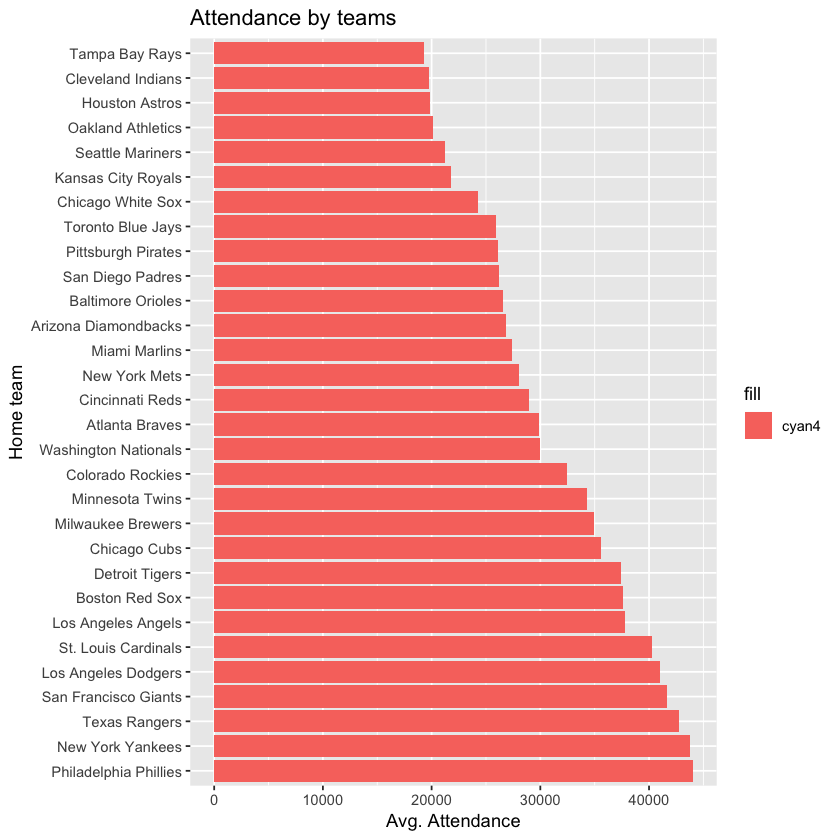

In [5]:
home_team_attend %>% ggplot(aes(x = reorder(home_team, -Avg_Attend), y = Avg_Attend, fill = "cyan4")) + 
geom_bar(stat = "identity") + coord_flip() + labs(x= "Home team", y = "Avg. Attendance", title = "Attendance by teams")
ggsave('attendance by team.png', width = 10, height = 6)

#### Bobblehead on attendance

In [6]:
#Bobblehead data
BH_count <- data %>% group_by(home_team, bobblehead) %>% summarize (n = n())
BH_count

home_team,bobblehead,n
Arizona Diamondbacks,NO,76
Arizona Diamondbacks,YES,5
Atlanta Braves,NO,78
Atlanta Braves,YES,3
Baltimore Orioles,NO,78
Baltimore Orioles,YES,1
Boston Red Sox,NO,81
Chicago Cubs,NO,77
Chicago Cubs,YES,4
Chicago White Sox,NO,78


Warning message:
“Width not defined. Set with `position_dodge(width = ?)`”

Warning message:
“Width not defined. Set with `position_dodge(width = ?)`”

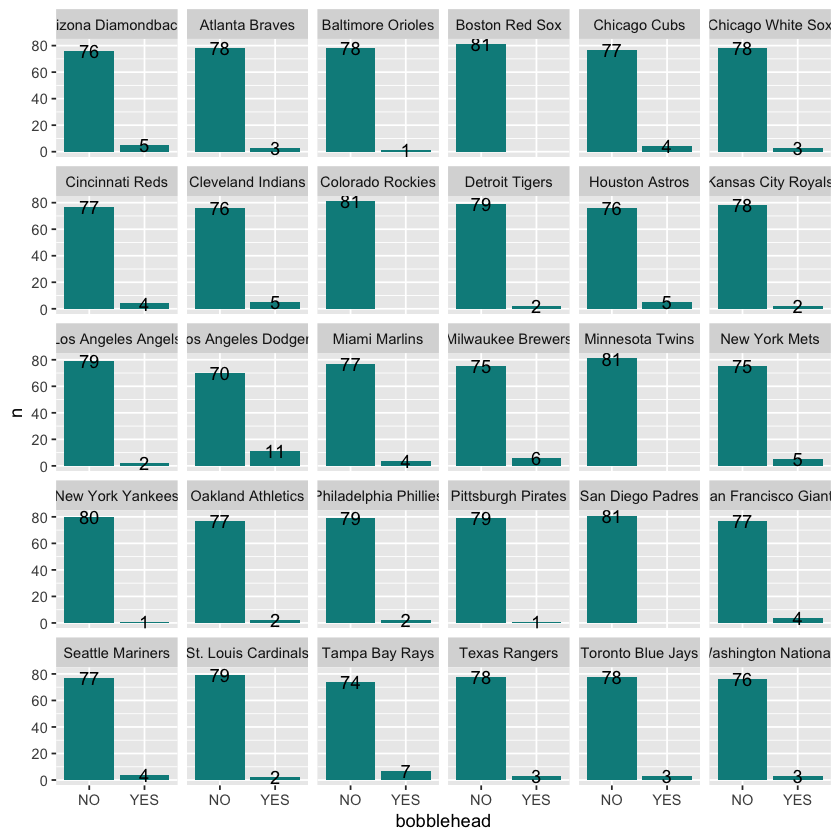

In [7]:
BH_count %>% ggplot(aes(bobblehead,n)) + geom_col(fill = "cyan4") + facet_wrap(~home_team) + geom_text(aes(label = n), position = "dodge", color = "black")
ggsave("Number of bobblehead per team.png", width = 5, height = 5)

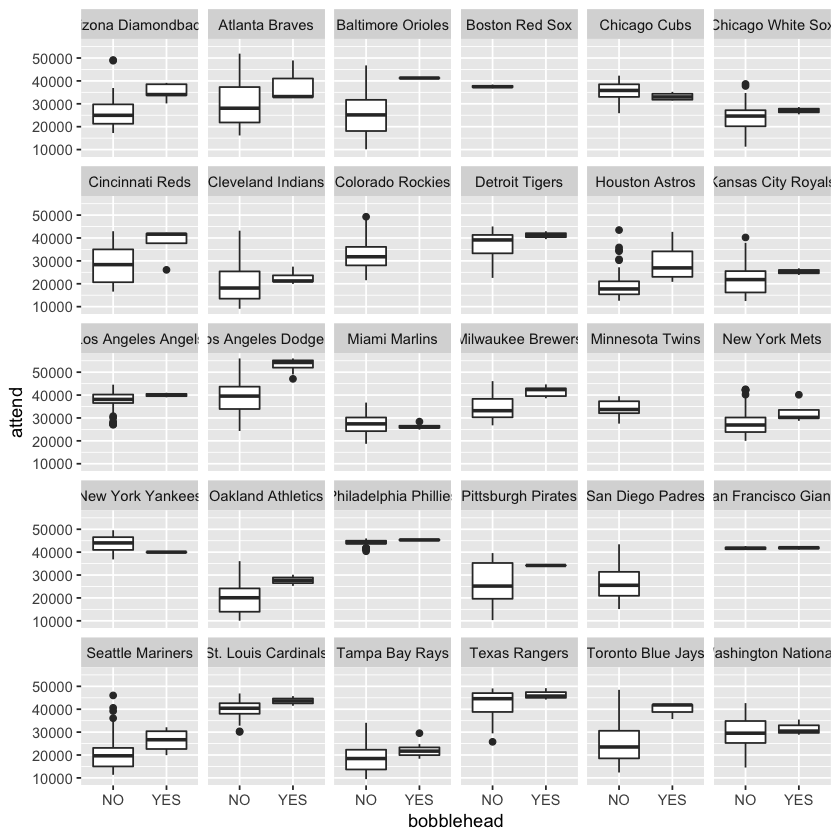

In [8]:
#Scatterplot of attendance by home teams with or without bobblehead promotion
data %>% ggplot(aes(bobblehead, attend)) + geom_boxplot() + facet_wrap(~home_team)
ggsave('bobblehead_attendance_by_team.png', width = 6, height =6)

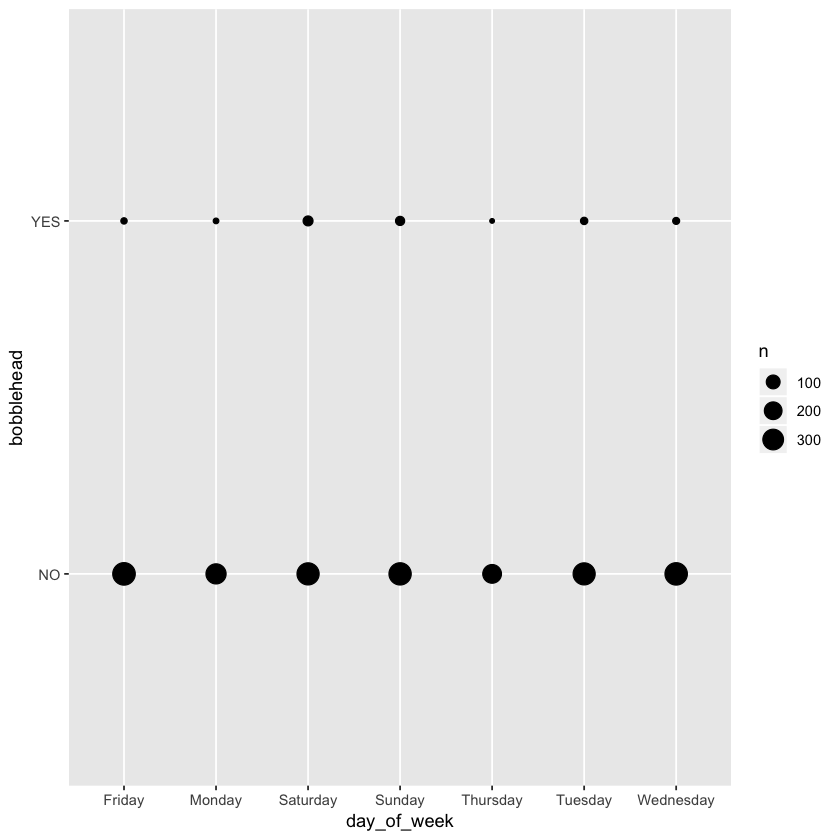

In [9]:
data %>% ggplot(aes(day_of_week, bobblehead)) + geom_count()
ggsave('Bobblehead by day of week.png', width = 6, height = 3)

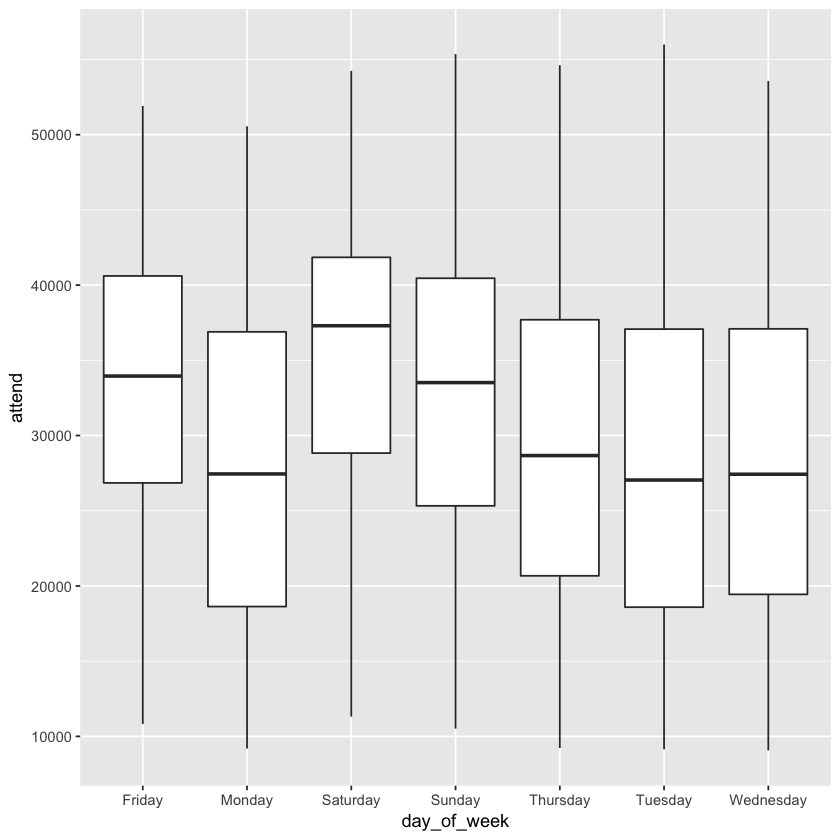

In [38]:
data %>% ggplot(aes(day_of_week, attend)) + geom_boxplot()
ggsave('Attendance by day of week.png', width = 6, height = 4)

#### Other promotions on attendance

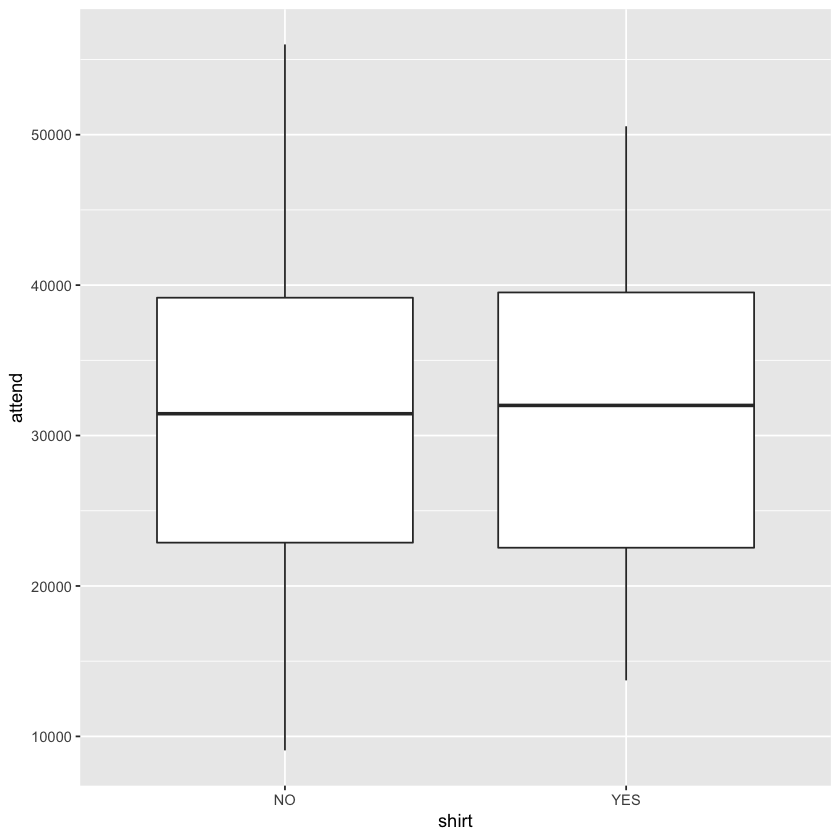

In [10]:
# Attendance by shirt promotion
data %>% ggplot(aes(shirt, attend)) + geom_boxplot()
ggsave('Attendance by shirt.png', width = 6, height = 4)

In [11]:
data %>% group_by(shirt) %>% summarize(mean(attend))

shirt,mean(attend)
NO,30841.36
YES,31715.49


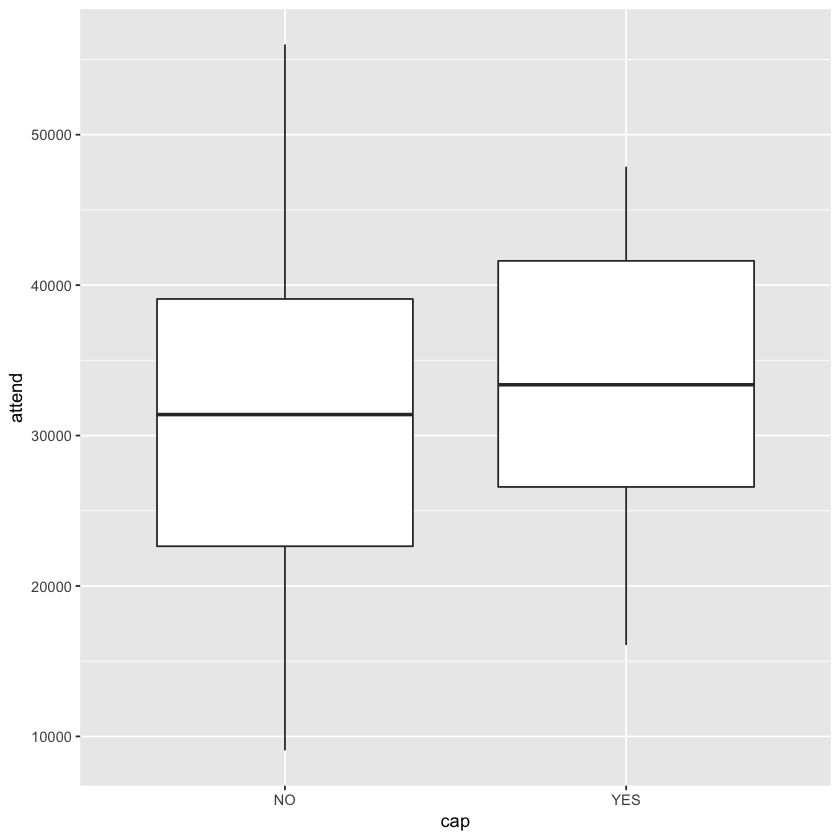

In [12]:
#Attendance by cap promotion
data %>% ggplot(aes(cap, attend)) + geom_boxplot()
ggsave('Attendance by cap.png', width = 6, height = 4)

In [13]:
data %>% group_by(cap) %>% summarize(mean(attend))

cap,mean(attend)
NO,30792.88
YES,33470.89


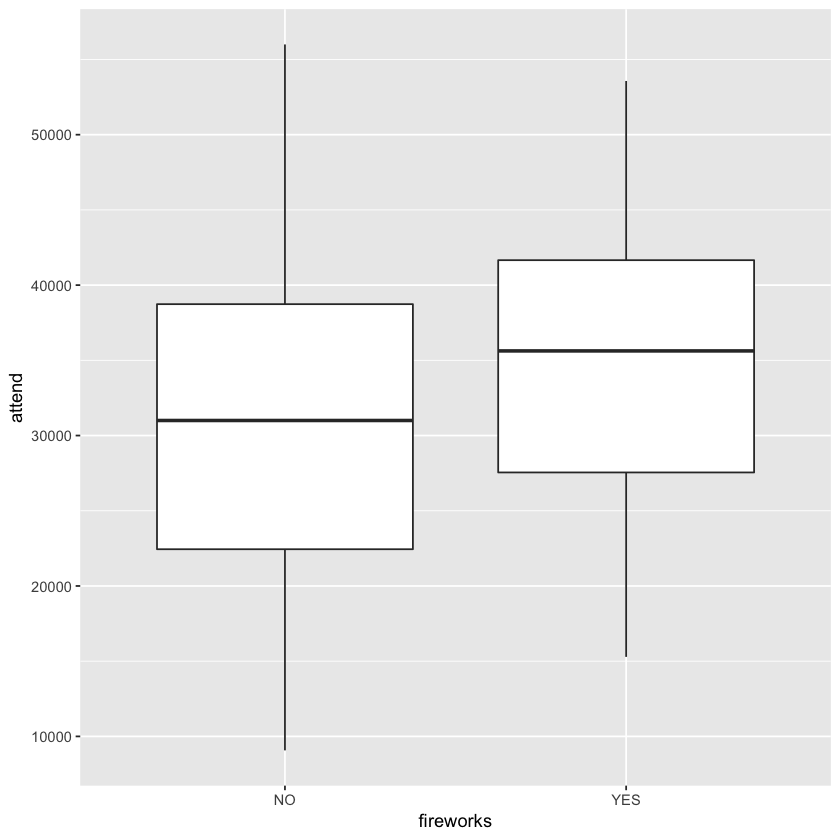

In [14]:
#Attendance by fireworks
data %>% ggplot(aes(fireworks, attend)) + geom_boxplot()
ggsave('Attendance by fireworks.png', width = 6, height = 4)

In [15]:
data %>% group_by(fireworks) %>% summarize(mean(attend))

fireworks,mean(attend)
NO,30595.06
YES,34405.91


#### Seasonal Effect

In [16]:
data <- unite(data, col = "date", month, day, year, sep = "-", remove = FALSE)
data$date <- mdy(data$date) #turning the string into date format

In [17]:
#round the date to the beginning of the month
data$round_date <- floor_date(data$date, "month")

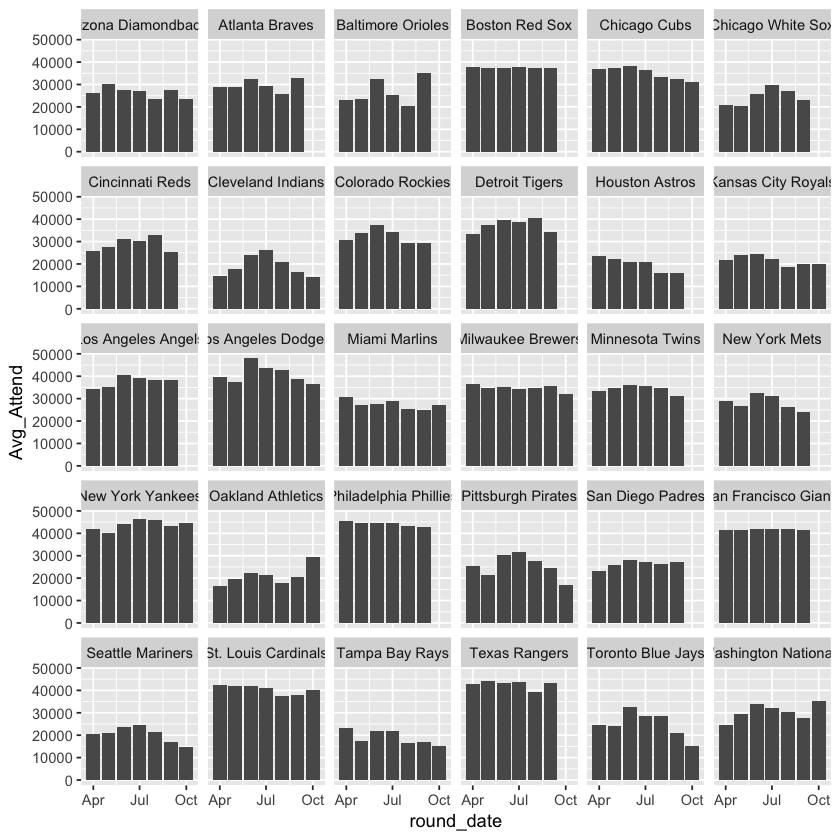

In [18]:
team_month_attend <- data %>% group_by(home_team, round_date) %>% summarize(Avg_Attend = mean(attend))
team_month_attend %>% ggplot(aes(x=round_date, y = Avg_Attend)) + geom_col() + facet_wrap(~home_team) 
ggsave("Seasonal effect.png", width = 5, height = 5)

#### Weather on attendance

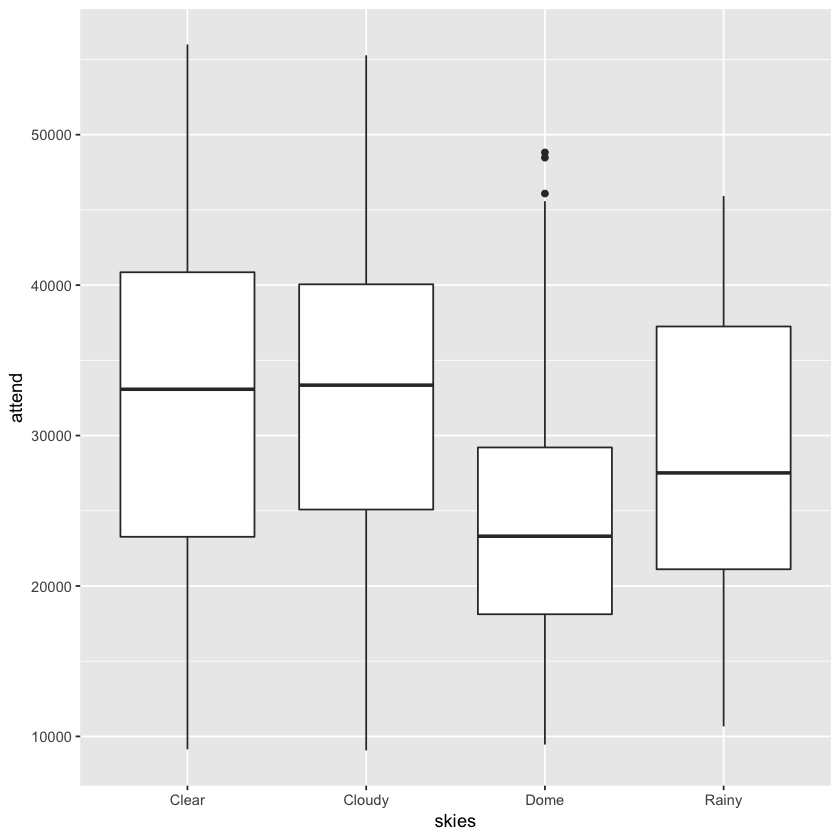

In [19]:
data %>% ggplot(aes(skies, attend)) + geom_boxplot()
ggsave('Attendance by skies.png', width = 6, height = 4)

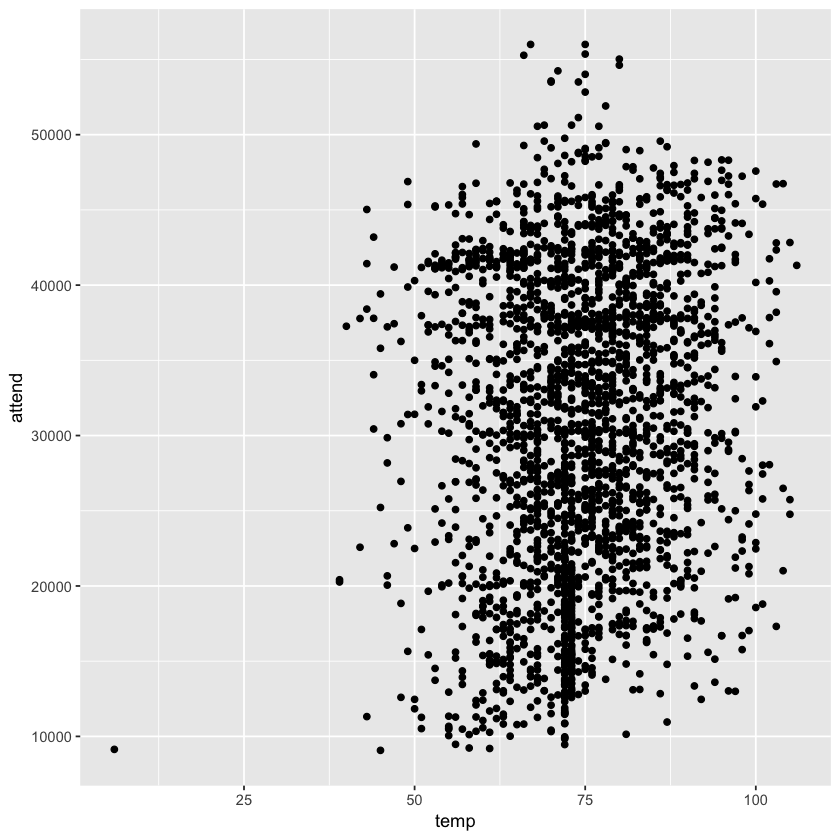

In [61]:
data %>% ggplot(aes(temp, attend)) + geom_point()
ggsave('Temp vs. Attendance.png', width = 7, height = 4)

### Inferrence from EDA:
It seems that all independent variables have some effect on attendance. So we better include all of these attendance in our model along with bobblehead

# Modeling: Using 3 approaches: Aggregate, Groups and hierachial

Variables that are included in the model:
- Day of week
- Temp
- Skies
- Day
- Cap
- Shirt
- Fireworks
- Bobblehead

### Aggregate 

In [20]:
agg.model <- lm(attend ~ home_team + month + day_of_week + temp + skies + day_night + cap + shirt + fireworks + bobblehead, data)

In [21]:
summary(agg.model)


Call:
lm(formula = attend ~ home_team + month + day_of_week + temp + 
    skies + day_night + cap + shirt + fireworks + bobblehead, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-14341.7  -3450.2   -432.7   2981.2  26913.8 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    28067.775   1423.009  19.724  < 2e-16 ***
home_teamAtlanta Braves         2626.216    929.246   2.826 0.004750 ** 
home_teamBaltimore Orioles      -366.217    942.450  -0.389 0.697622    
home_teamBoston Red Sox        11162.971    955.788  11.679  < 2e-16 ***
home_teamChicago Cubs           8504.004    967.667   8.788  < 2e-16 ***
home_teamChicago White Sox     -2975.392    946.503  -3.144 0.001690 ** 
home_teamCincinnati Reds        1888.822    934.521   2.021 0.043375 *  
home_teamCleveland Indians     -7646.170    961.574  -7.952 2.82e-15 ***
home_teamColorado Rockies       5686.795    941.675   6.039 1.80e-09 ***


Some teams come from the cities that have higher attendance than other cities
Overall bobblehead has effect on attendance (higher than other types of promotion)
--> how about using stepwise to optimize the parameters?

In [ ]:
agg.model2 <- lm(attend ~ home_team + month + day_of_week + temp + skies + day_night + cap + shirt + fireworks + bobblehead, data)

In [ ]:
summary(agg.model2)

We next try to see if the effect of bobble head on attendance varies among teams

In [ ]:
#the effect of bobblehead vary by the weekend or weekday

In [95]:
data$weekend <- ifelse(data$day_of_week == "Friday", "YES", ifelse(data$day_of_week == "Saturday", "YES", ifelse(data$day_of_week == "Sunday", "YES", "NO")))

In [97]:
data %>% group_by(weekend, bobblehead) %>% summarize(avg.attendance = mean(attend))

weekend,bobblehead,avg.attendance
NO,NO,26947.34
NO,YES,39193.22
YES,NO,33167.52
YES,YES,33655.29


In [ ]:
data.weekend <- data %>% filter(weekend == "YES")
data.weekday <- data%>% filter(weekend == "NO")

In [ ]:
weekend_BH <- lm(attend ~ home_team + month + day_of_week + temp + skies + day_night + cap + shirt + fireworks + bobblehead, data.weekend)

In [ ]:
weekday_BH <- lm(attend ~ home_team + month + day_of_week + temp + skies + day_night + cap + shirt + fireworks + bobblehead, data.weekday)

In [ ]:
summary(weekday_BH)

In [ ]:
summary(weekend_BH)

In [ ]:
#how about using interaction model
#create multilevel model
ml.model <- lm(attend ~ home_team + month + day_of_week + temp + skies + day_night + cap + shirt + fireworks + bobblehead + 
                 weekend:bobblehead, data)

### Groups by city

In [89]:
city <- read_excel("/Users/a1/Desktop/MBA study/Courses/Winter 2019/Predictive analytic project/Bobblehead/MDS_Chapter_8/city.xlsx", sheet =1)
city2 <- read_excel("/Users/a1/Desktop/MBA study/Courses/Winter 2019/Predictive analytic project/Bobblehead/MDS_Chapter_8/city.xlsx", sheet =2)

In [90]:
population = merge(city, city2, by.x = "City", by.y = "Name", all.x = TRUE, )
population$city_type <- ifelse(population$POP2019 > 1000000, "BIG", "SMALL")
population <- population[-c(3:8)]

In [91]:
population

City,Teams,city_type
Anaheim,Los Angeles Angels,SMALL
Arlington,Texas Rangers,SMALL
Atlanta,Atlanta Braves,SMALL
Baltimore,Baltimore Orioles,SMALL
Boston,Boston Red Sox,SMALL
Chicago,Chicago Cubs,BIG
Chicago,Chicago White Sox,BIG
Cincinnati,Cincinnati Reds,SMALL
Cleveland,Cleveland Indians,SMALL
Corona,New York Mets,SMALL


In [98]:
population %>% group_by(city_type) %>% summarize(n = n())

ERROR: Error: Column `bobblehead` is unknown


In [73]:
#Joining 2 datasets
data <- merge(data, population, by.x = "home_team", by.y = "Teams", all.x = TRUE)

In [74]:
head(data)

home_team,year,date,month,day,attend,day_of_week,opponent,temp,skies,⋯,round_date,City.x,Rank,POP2019,2016 Population,2010 Census,Change,2019 Density,City.y,city_type
Arizona Diamondbacks,2012,2012-04-06,APR,6,49130,Friday,San Francisco Giants,77,Cloudy,⋯,2012-04-01,Phoenix,5,1711356,1615017,1445632,0.0191,"1,276/km²",Phoenix,BIG
Arizona Diamondbacks,2012,2012-04-07,APR,7,34789,Saturday,San Francisco Giants,79,Clear,⋯,2012-04-01,Phoenix,5,1711356,1615017,1445632,0.0191,"1,276/km²",Phoenix,BIG
Arizona Diamondbacks,2012,2012-04-08,APR,8,24193,Sunday,San Francisco Giants,83,Cloudy,⋯,2012-04-01,Phoenix,5,1711356,1615017,1445632,0.0191,"1,276/km²",Phoenix,BIG
Arizona Diamondbacks,2012,2012-04-16,APR,16,17366,Monday,Pittsburgh Pirates,81,Clear,⋯,2012-04-01,Phoenix,5,1711356,1615017,1445632,0.0191,"1,276/km²",Phoenix,BIG
Arizona Diamondbacks,2012,2012-04-17,APR,17,19198,Tuesday,Pittsburgh Pirates,87,Clear,⋯,2012-04-01,Phoenix,5,1711356,1615017,1445632,0.0191,"1,276/km²",Phoenix,BIG
Arizona Diamondbacks,2012,2012-04-18,APR,18,18368,Wednesday,Pittsburgh Pirates,84,Clear,⋯,2012-04-01,Phoenix,5,1711356,1615017,1445632,0.0191,"1,276/km²",Phoenix,BIG


In [99]:
data %>% group_by(city_type, bobblehead) %>% summarize(avg.attendance = mean(attend))

city_type,bobblehead,avg.attendance
BIG,NO,31537.03
BIG,YES,40348.00
SMALL,NO,29238.01
SMALL,YES,32473.05


In [100]:
data_big <- data %>% filter(city_type == "BIG")
data_small <- data %>% filter(city_type == "SMALL")

In [101]:
#Linear regression on data from big cities
BH_big <- lm(attend ~ home_team + month + day_of_week + temp + skies + day_night + cap + shirt + 
             fireworks + bobblehead, data_big)

In [102]:
#Linear regression on data from small cities
BH_small <- lm(attend ~ home_team + month + day_of_week + temp + skies + day_night + cap + shirt + 
               fireworks + bobblehead, data_small)

In [103]:
summary(BH_big)


Call:
lm(formula = attend ~ home_team + month + day_of_week + temp + 
    skies + day_night + cap + shirt + fireworks + bobblehead, 
    data = data_big)

Residuals:
     Min       1Q   Median       3Q      Max 
-12536.3  -3375.8   -255.1   2555.3  26093.6 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    26264.15    2426.68  10.823  < 2e-16 ***
home_teamChicago Cubs           8748.47    1152.07   7.594 9.99e-14 ***
home_teamChicago White Sox     -2114.90    1076.55  -1.965 0.049865 *  
home_teamHouston Astros        -7304.94     873.53  -8.363 3.32e-16 ***
home_teamLos Angeles Dodgers   13928.94    1059.09  13.152  < 2e-16 ***
home_teamNew York Yankees      17456.96    1090.59  16.007  < 2e-16 ***
home_teamPhiladelphia Phillies 17730.89    1065.20  16.646  < 2e-16 ***
home_teamSan Diego Padres        439.89    1101.15   0.399 0.689656    
home_teamToronto Blue Jays      -348.05     948.24  -0.367 0.713695    
monthA

In [104]:
summary(BH_small)


Call:
lm(formula = attend ~ home_team + month + day_of_week + temp + 
    skies + day_night + cap + shirt + fireworks + bobblehead, 
    data = data_small)

Residuals:
     Min       1Q   Median       3Q      Max 
-14230.1  -3287.0   -532.5   2949.5  26443.1 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    31831.579   1406.665  22.629  < 2e-16 ***
home_teamBaltimore Orioles     -2679.301    826.961  -3.240 0.001216 ** 
home_teamBoston Red Sox         8528.711    829.461  10.282  < 2e-16 ***
home_teamCincinnati Reds        -692.438    812.320  -0.852 0.394089    
home_teamCleveland Indians    -10297.167    840.282 -12.254  < 2e-16 ***
home_teamColorado Rockies       3141.208    817.932   3.840 0.000127 ***
home_teamDetroit Tigers         7429.482    827.189   8.982  < 2e-16 ***
home_teamKansas City Royals    -7791.203    655.587 -11.884  < 2e-16 ***
home_teamLos Angeles Angels     8160.620    829.054   9.843  < 2e-1

In [ ]:
summary(data_big)

In [ ]:
summary(data_small)

### Hierachial model

In [22]:
ml.model <- lmer(attend ~  month + day_of_week + temp + skies + day_night + cap + shirt + 
             fireworks + bobblehead + (1 + bobblehead | home_team), data = data)

In [23]:
summary(ml.model)


Correlation matrix not shown by default, as p = 22 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: attend ~ month + day_of_week + temp + skies + day_night + cap +  
    shirt + fireworks + bobblehead + (1 + bobblehead | home_team)
   Data: data

REML criterion at convergence: 48212.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7162 -0.6317 -0.0846  0.5573  5.1545 

Random effects:
 Groups    Name          Variance Std.Dev. Corr
 home_team (Intercept)   61816331 7862         
           bobbleheadYES 15134305 3890     0.03
 Residual                27653719 5259         
Number of obs: 2421, groups:  home_team, 30

Fixed effects:
                      Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)          32004.707   1792.170    68.792  17.858  < 2e-16 ***
monthAUG               522.550    440.616  2363.799   1.186 0.235760    
monthJUL              2464.097    459.686  2367.527   5.360 9.11e-08 ***
monthJUN              2986.974    432.875  2366.344   6.

In [ ]:
vcov(ml.model)

In [49]:
class(fixef(ml.model)['bobbleheadYES'])

[1] "numeric"

In [76]:
bobblehead_ranef <- as.data.frame(ranef(ml.model), stringsAsFactors = default.stringsAsFactors()) %>% filter(term == "bobbleheadYES")

In [77]:
bobblehead_ranef <- bobblehead_ranef[-c(1,2,5)]

In [78]:
colnames(bobblehead_ranef) <- c("Team", "Random_effect")

In [79]:
Team_significant <- BH_count %>% filter(bobblehead == "YES" & n > 2)

In [80]:
bobblehead_ranef <- merge(bobblehead_ranef, Team_significant, by.x = "Team", by.y = "home_team", sort = TRUE)
bobblehead_ranef <- bobblehead_ranef[-c(3,4)]

In [81]:
bobblehead_ranef

Team,Random_effect
Arizona Diamondbacks,979.6183
Atlanta Braves,2681.0302
Chicago Cubs,-2689.8511
Chicago White Sox,-3245.2277
Cincinnati Reds,1887.3003
Cleveland Indians,-1205.3184
Houston Astros,1363.2638
Los Angeles Dodgers,9769.1238
Miami Marlins,-1264.4920
Milwaukee Brewers,562.4077


In [82]:
bobblehead_ranef$Final_avg_effect <- bobblehead_ranef$Random_effect + fixef(ml.model)['bobbleheadYES']

In [90]:
bobblehead_ranef$Final_avg_effect

[1]  4976.7252  6678.1371  1307.2558   751.8792  5884.4072  2791.7885
 [7]  5360.3707 13766.2307  2732.6149  4559.5146  1043.9639 -1023.1492
[13]  3124.5957  1368.9797  2475.6719  8837.9607   775.2319

In [91]:
?order()

In [93]:
bobblehead_ranef <- bobblehead_ranef[order(-bobblehead_ranef$Final_avg_effect),]

In [98]:
bobblehead_ranef 

,Team,Random_effect,Final_avg_effect
8,Los Angeles Dodgers,9769.1238,13766.2307
16,Toronto Blue Jays,4840.8538,8837.9607
2,Atlanta Braves,2681.0302,6678.1371
5,Cincinnati Reds,1887.3003,5884.4072
7,Houston Astros,1363.2638,5360.3707
1,Arizona Diamondbacks,979.6183,4976.7252
10,Milwaukee Brewers,562.4077,4559.5146
13,Seattle Mariners,-872.5112,3124.5957
6,Cleveland Indians,-1205.3184,2791.7885
9,Miami Marlins,-1264.4920,2732.6149


Warning message:
“Ignoring unknown parameters: digits”

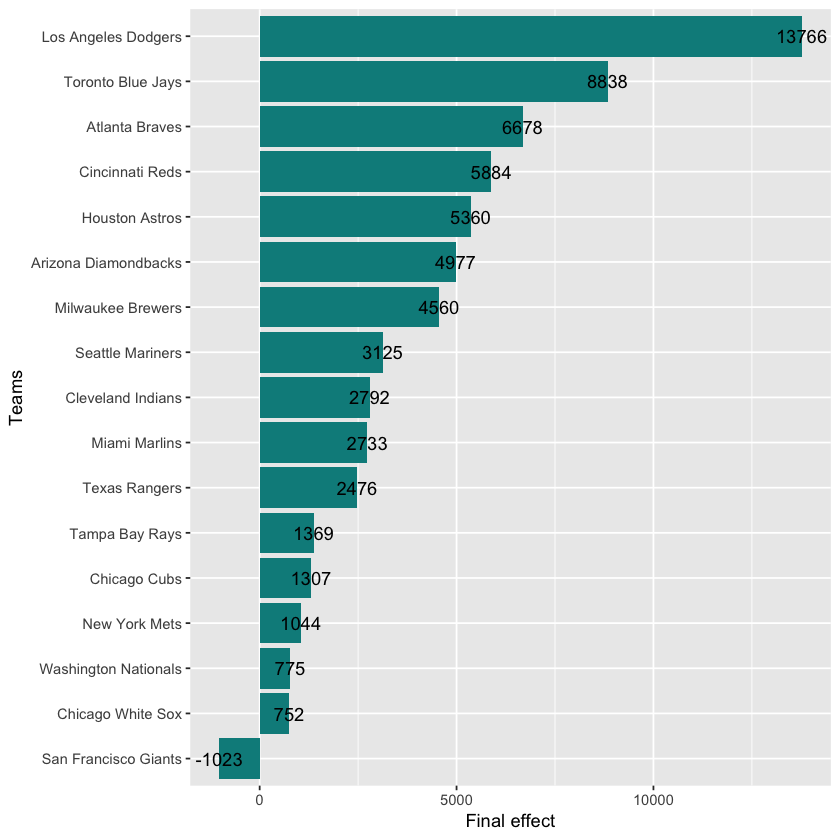

In [121]:
bobblehead_ranef %>% ggplot(aes(x = reorder(Team,Final_avg_effect), y = Final_avg_effect)) + geom_col(fill = "cyan4") + coord_flip() + 
geom_text(aes(label = round(Final_avg_effect, digits = 0)), position = "identity", digits =0) + labs(x = "Teams", y = "Final effect")
ggsave("Final average effect of bobblehead by teams.png", width = 8, height =5)

In [57]:
Team_insignificant <- BH_count %>% filter(bobblehead == "YES" & n <3 )

In [84]:
?merge

In [24]:
gg <- plot_model(ml.model, type = "re", sort.est = "bobbleheadYES", show.intercept = TRUE,
                 free.scale = FALSE, show.values= TRUE,value.size =3, digits =0, value.offset = 0.5, dot.size = 2)

ERROR: Error in plot_model(ml.model, type = "re", sort.est = "bobbleheadYES", : could not find function "plot_model"


In [115]:
?geom_text

In [117]:
?round()